In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv
/kaggle/input/gemstone-price-prediction/Data Dictionary.xlsx


### Problem Statement 1: Linear Regression: Diamond price prediction.¶
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Data Dictionary: Variable Name : Description

Carat:Carat weight of the cubic zirconia. Cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,Premium,Ideal. Color: Colour of the cubic zirconia.With D being the best and J the worst. Clarity :cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 1. flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 Depth : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter. Table : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter. Price : the Price of the cubic zirconia. X : Length of the cubic zirconia in mm. Y : Width of the cubic zirconia in mm. Z : Height of the cubic zirconia in mm.

In [2]:
# importing libraries
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

### Importing Data

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv('../input/gemstone-price-prediction/cubic_zirconia.csv',index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.dtypes #cheacking the type of dataset

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [6]:
df.shape #checking the shape of dataset

(26967, 10)

In [7]:
df.info() #getting the information of data type from  dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


### Summary of the dataset
The data set contains 26967 row and 11 columns. In the given data set there are 2 Integer 
type features,6 Float type features and 3 Object type features. Where 'price' is the target 
variable and all other are predictor variable. The first column is an index ("Unnamed: 0") as 
this only serial no, we can remove it. Except for the column depth, the rest null count is 
26967.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [9]:
df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [10]:

print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [11]:
df.shape

(26967, 10)

**On the given data set the the mean and median values does not have much differenc. .We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. .There are three object data type 'cut', 'color' and 'clarity'.**

### EXPLORATORY DATA ANALYSIS 
#### Step 1: Check and remove any duplicates in the dataset 
#### Step 2: Check and treat any missing values in the dataset 
#### Step 3: Outlier Treatment 
#### Step 4: Univariate Analysis 
#### Step 5: Bi-variate Analysis

##### step 1: Check and remove any duplicates in the dataset

In [12]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 10)

In [13]:
df.duplicated().sum()

33

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


##### Step 2: Check and treat any missing values in the dataset

In [16]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [17]:
df.median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

In [18]:
df=df.fillna(df.median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [19]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### Step 3: Outlier Treatment

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


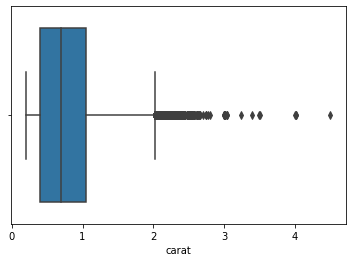

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


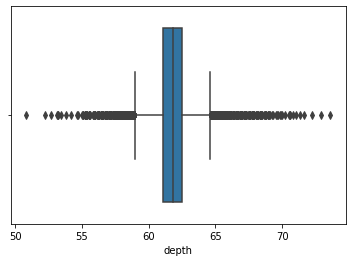

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


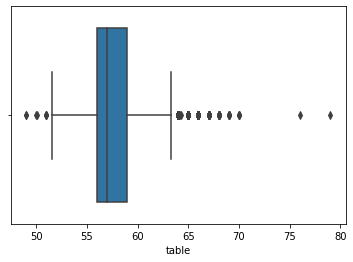

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


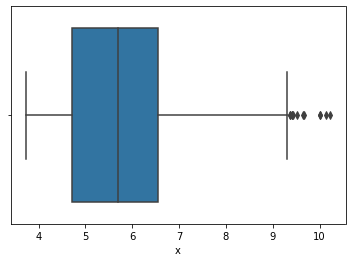

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


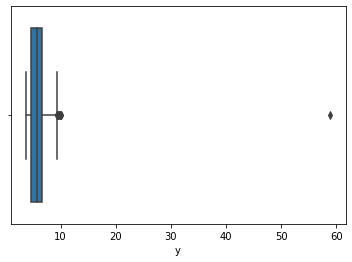

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


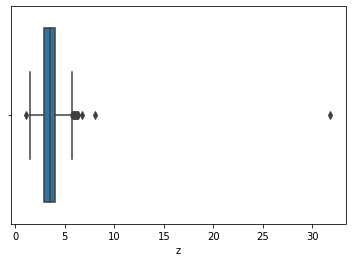

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


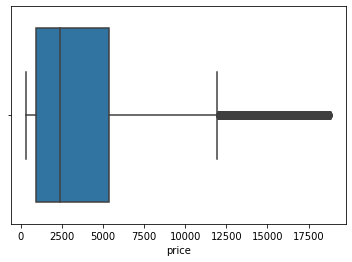

In [20]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


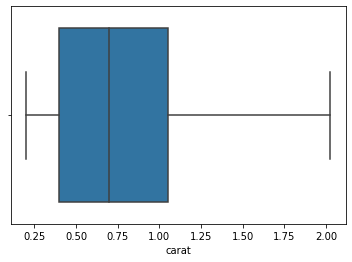

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


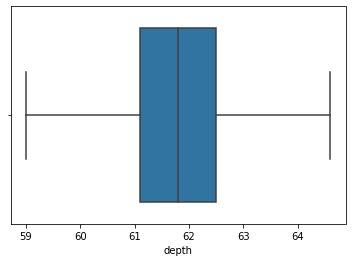

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


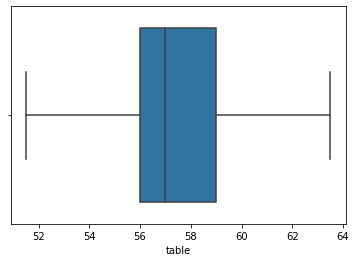

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


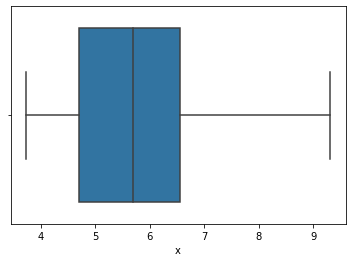

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


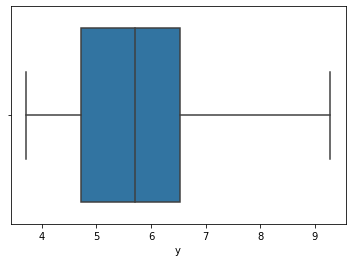

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


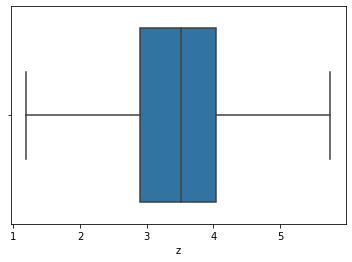

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


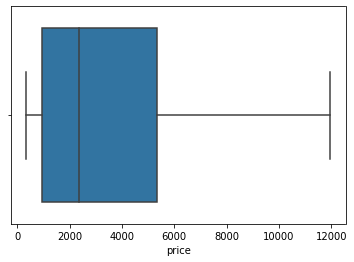

In [23]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

 #### Step 4 : Univariate Analysis.

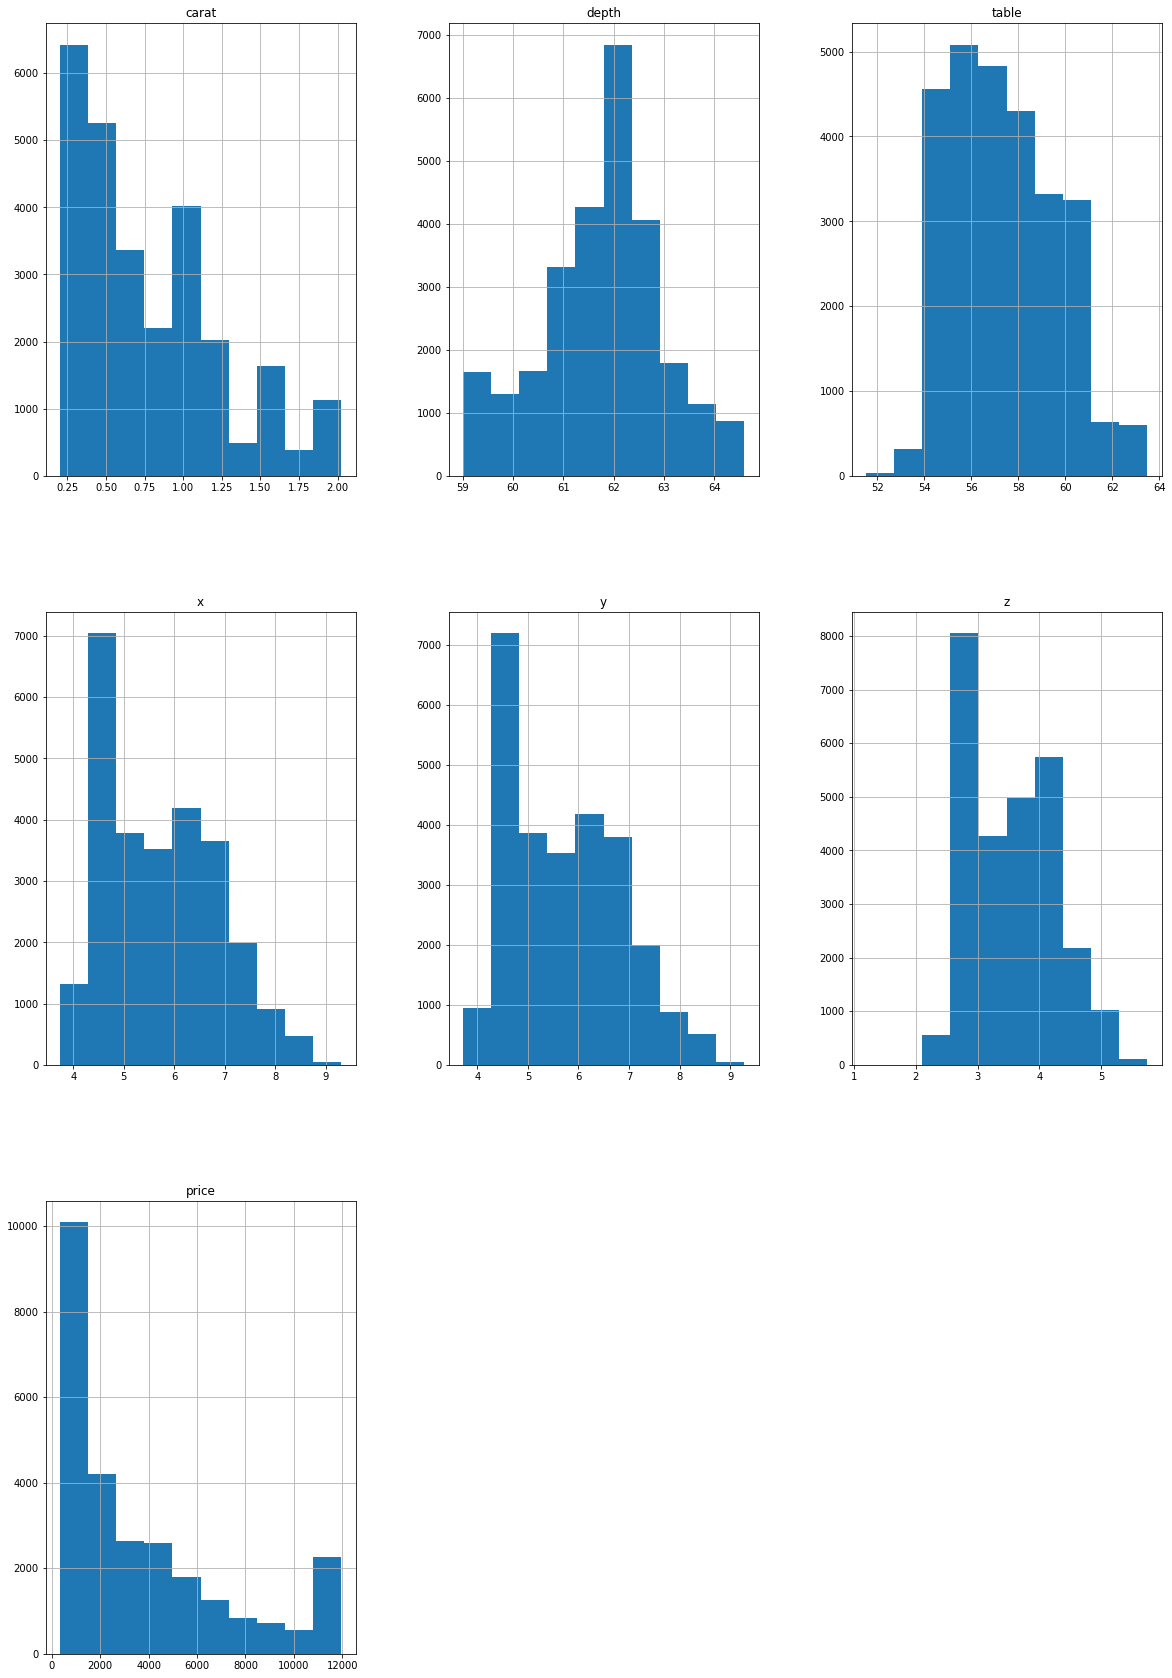

In [24]:
df.hist(figsize=(20,30));

In [25]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    0.917214
depth   -0.194474
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

**There is significant amount of outlier present in some variable. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed"**

#### Step 5 : Bivariate Analysis.

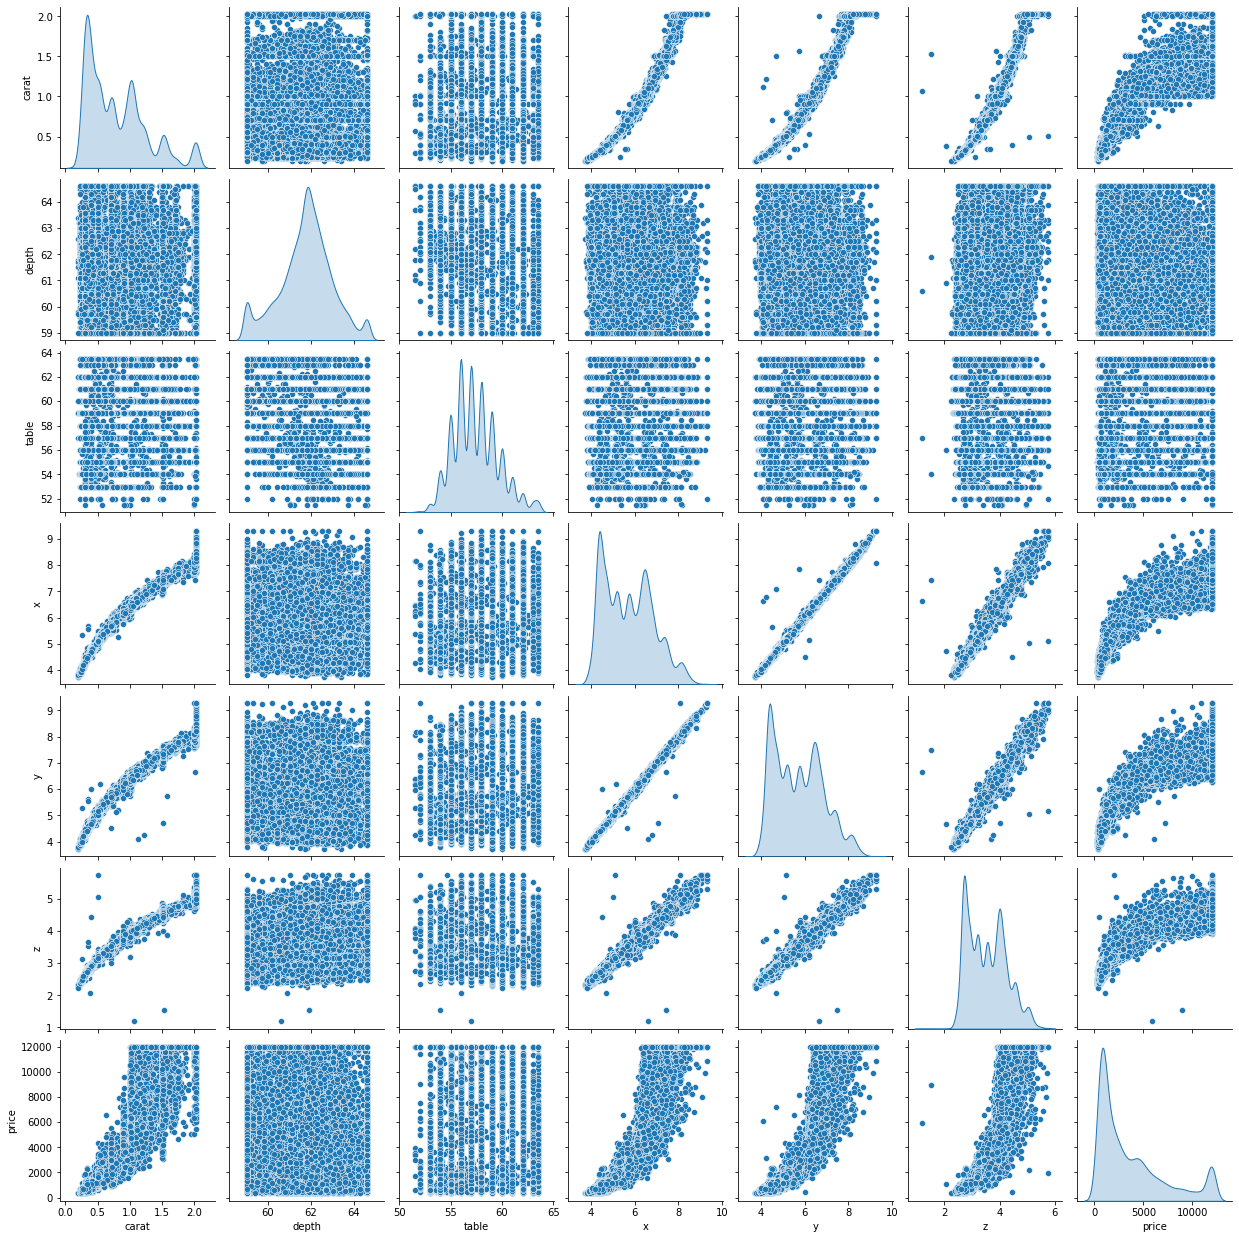

In [26]:
df_attr = ( df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

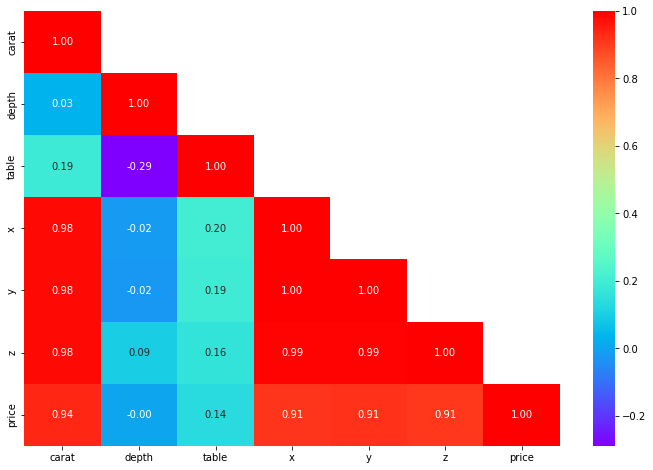

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

In [28]:
correlations = df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth   -0.000845
Name: price, dtype: float64

**It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).**

**EDA for Categorical variable.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


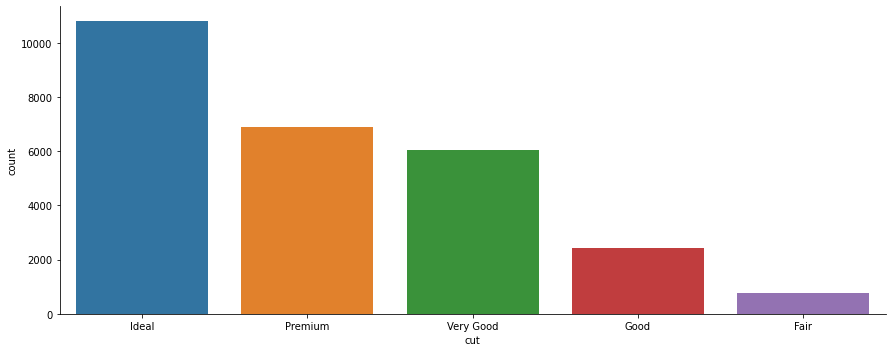

In [29]:
sns.catplot('cut', data=df, kind='count',aspect=2.5)

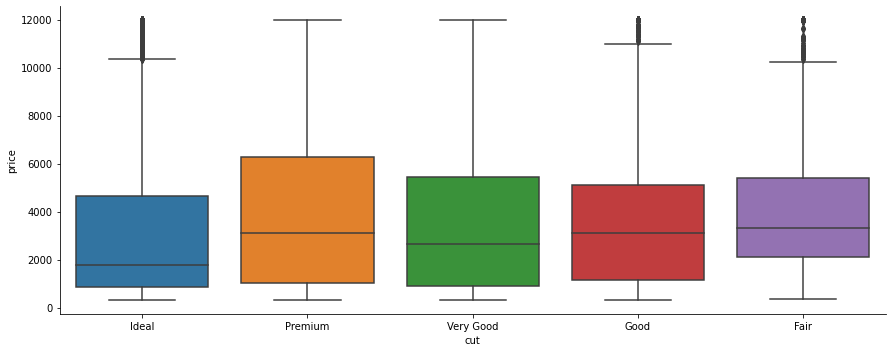

In [30]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


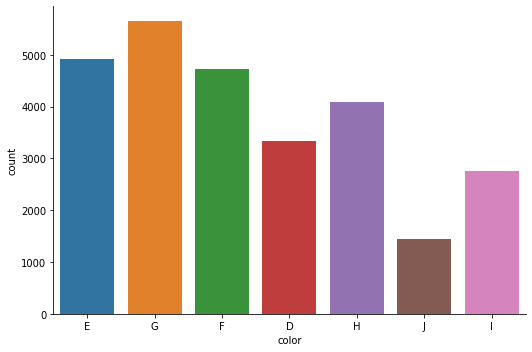

In [31]:
sns.catplot('color', kind='count', data=df, aspect=1.5)

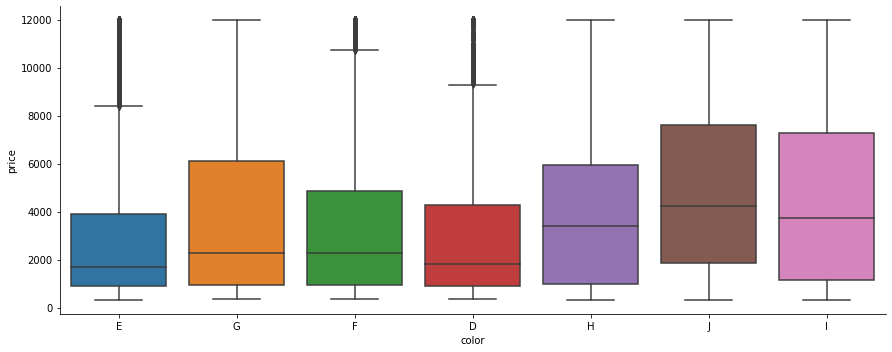

In [32]:
sns.catplot(x='color', y='price', data=df, aspect =2.5, kind='box')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


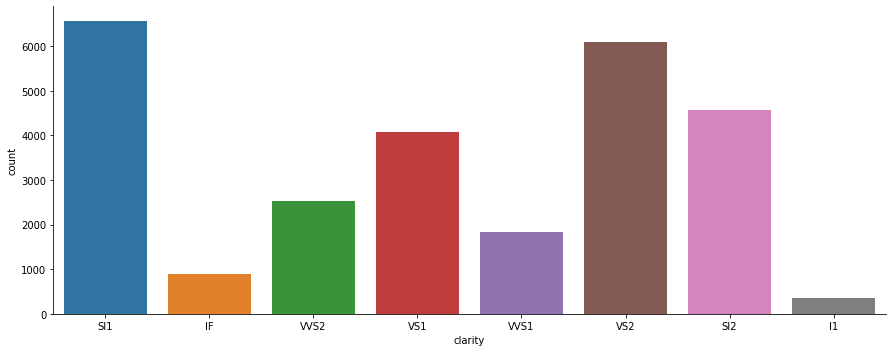

In [33]:
sns.catplot('clarity', data=df, kind='count',aspect=2.5)

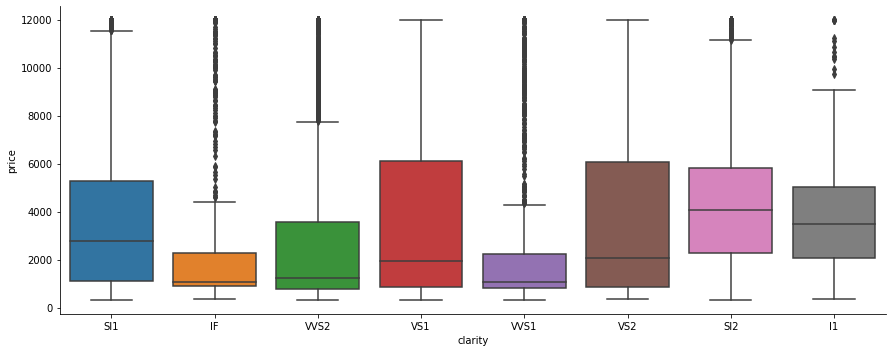

In [34]:
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box')

In [35]:
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




****Converting objects to the categorical code

In [36]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [37]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [38]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [39]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [40]:
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [41]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [42]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
2,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
3,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
4,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
5,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


Train-test Split:

In [43]:
X = df.drop('price', axis=1)
y = df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
2,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
3,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
4,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
5,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [44]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [45]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [46]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8887.182245900449
The coefficient for cut is 113.33064005373365
The coefficient for color is 273.2259918127144
The coefficient for clarity is 436.898475315091
The coefficient for depth is 35.446432597916235
The coefficient for table is -15.069203823159668
The coefficient for x is -1348.7213850676328
The coefficient for y is 1561.8443409182546
The coefficient for z is -970.5030385552966


In [48]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5020.968802173227


In [49]:
regression_model.score(X_train, y_train)

0.9312287832968958

In [50]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.9316264205922415

In [51]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

906.8992122331998

In [52]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.2937284982527

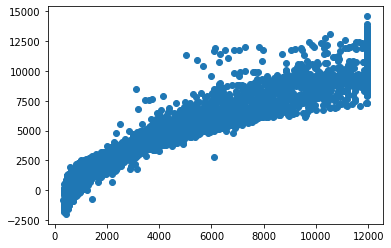

In [53]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [54]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [55]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [56]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1818110678016294
The coefficient for cut is 0.036457616719463376
The coefficient for color is 0.13464282711260614
The coefficient for clarity is 0.2083158705995446
The coefficient for depth is 0.012495815398862246
The coefficient for table is -0.0093966371719987
The coefficient for x is -0.43725905638071333
The coefficient for y is 0.5029014329313658
The coefficient for z is -0.19444498389036471


In [57]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -7.256670475565831e-16


In [58]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9315877991921917

## Check Multi-collinearity using VIF

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [61]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.81533420992797
cut ---> 10.301700261178262
color ---> 5.545655069061811
clarity ---> 5.459090831787082
depth ---> 1219.3088141451183
table ---> 874.1719859615408
x ---> 10678.52359972728
y ---> 9425.444226847116
z ---> 3317.944059606902


**We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.**

**We are exploring the Linear Regression using statsmodels as we are interested in some more statistical metrics of the model.**
### Linear Regression using statsmodels.

### concatenate X and y into a single dataframe

In [62]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5031,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12109,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20182,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4713,0.76,1.0,3.0,2.0,59.0,63.0,6.05,5.97,3.47,2447.0
2549,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [63]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -5020.968802
carat        8887.182246
cut           113.330640
color         273.225992
clarity       436.898475
depth          35.446433
table         -15.069204
x           -1348.721385
y            1561.844341
z            -970.503039
dtype: float64

In [64]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        07:05:25   Log-Likelihood:            -1.5509e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5020.9688    800.101     -6.275      0.0

**Assuming null hypothesis is true, i.e there is no relationship between this variable with price. from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.**

**Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero. As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'. Here all regression co-efficients are not '0'.**

**For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. That means this dimension is useless. So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.**

In [65]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [66]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [67]:
np.sqrt(mse)

906.8992122331997

In [68]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

911.2937284982526

In [69]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

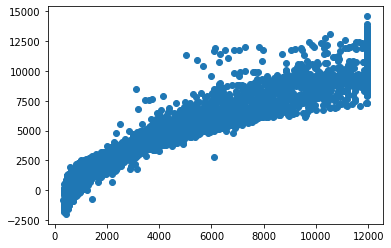

In [70]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [71]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-5020.97) * Intercept + (8887.18) * carat + (113.33) * cut + (273.23) * color + (436.9) * clarity + (35.45) * depth + (-15.07) * table + (-1348.72) * x + (1561.84) * y + (-970.5) * z + 

Recommendations:
1. The Gem Stones company should consider the features 'Carat', 'Cut', 'colour', 'clarity' andwidth i.e. 'y' as most important for predicting the price. To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.
2. As we can see from the model Higher the widtb('y') of the stone is higher the price.
3. So the stones having higher widtb('y') should consider in higher profitable stones. The'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.
4. The Diamonds clarity with 'VS1' &'VS2' are the most expensive. So these two category also consider in higher profitable stones.
5. As we see for 'X' i.e. Length. of the stone, higher the length of the stone is lower the price.
6. So higher the Length('x') of the stone are lower is the profitabilim higher the 'z' i.e Height of the stone is, lower the price. This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why.
7. Stones with higher 'z' is also are lower in profitability. 